In [ ]:
import pandas as pd
dataset=pd.read_csv("Online_Retail.csv",encoding='windows-1252')
print(dataset)

      InvoiceNo StockCode                          Description  Quantity  \
0        536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1        536365     71053                  WHITE METAL LANTERN         6   
2        536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3        536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4        536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...         ...       ...                                  ...       ...   
25909    538419     84978     HANGING HEART JAR T-LIGHT HOLDER         6   
25910    538419     22963               JAM JAR WITH GREEN LID         6   
25911    538419     84763        ZINC FINISH 15CM PLANTER POTS         3   
25912    538419     20977             36 PENCILS TUBE WOODLAND         1   
25913    538419     21984     PACK OF 12 PINK PAISLEY TISSUES          2   

          InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/10 8:26   

In [ ]:
dataset.isnull().sum()

InvoiceNo         0
StockCode         0
Description     113
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     9029
Country           1
dtype: int64

In [ ]:
data=dataset.dropna()

In [ ]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

<ipython-input-5-4604a2958f56>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()
<ipython-input-5-4604a2958f56>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

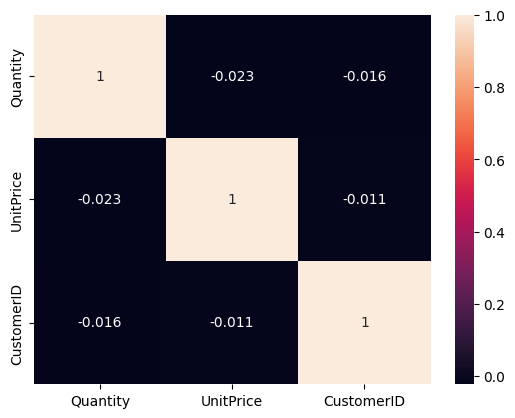

In [ ]:
import seaborn as sns
data.corr()
sns.heatmap(data.corr(), annot=True)

(0.0, 15.0)

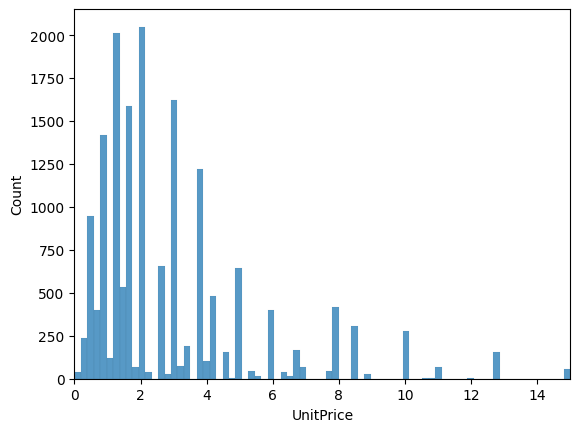

In [ ]:
sns.histplot(data=data,x='UnitPrice')
import matplotlib.pyplot as plt
plt.xlim(0, 15)

(0.0, 50.0)

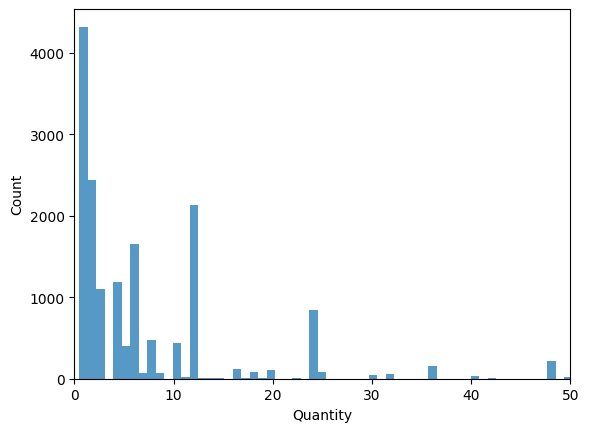

In [ ]:
sns.histplot(data=data,x='Quantity')
import matplotlib.pyplot as plt
plt.xlim(0, 50)

(0.0, 750.0)

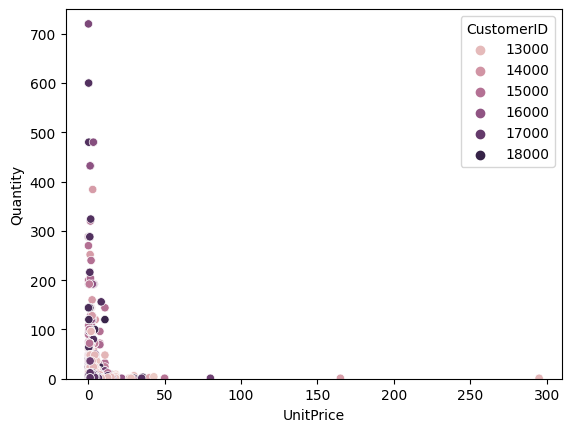

In [ ]:
li=sns.scatterplot(data=data, x='UnitPrice', y='Quantity', hue='CustomerID')
li.set_ylim(0,750)

<Axes: xlabel='UnitPrice', ylabel='Country'>

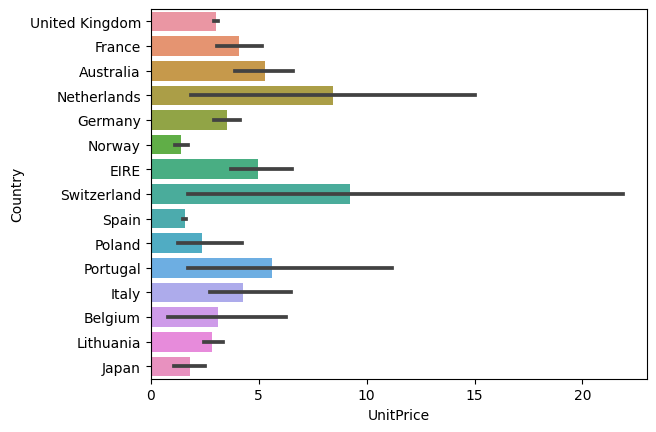

In [ ]:
sns.barplot(data=data,x='UnitPrice',y='Country')

<Axes: xlabel='CustomerID', ylabel='Count'>

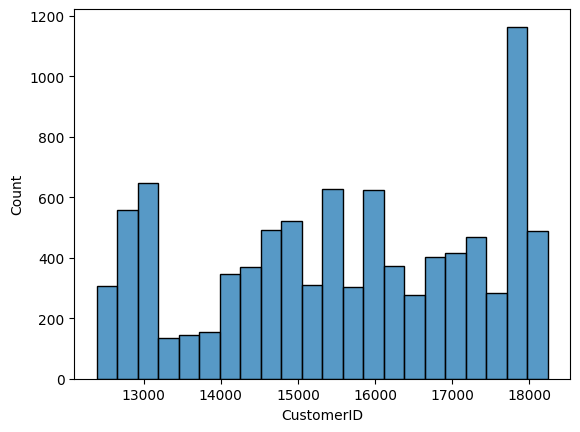

In [ ]:
sns.histplot(data=data,x='CustomerID')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [ ]:
kmeans_model = KMeans(init='k-means++',  max_iter=400, random_state=42)

In [ ]:
kmeans_model.fit(data[['CustomerID','UnitPrice',
'Quantity']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=400, random_state=42)

In [ ]:
def try_different_clusters(K, data):

    cluster_values = list(range(1, K+1))
    inertias=[]

    for c in cluster_values:
        model = KMeans(n_clusters = c,init='k-means++',max_iter=400,random_state=42)
        model.fit(data)
        inertias.append(model.inertia_)

    return inertias

In [ ]:
outputs = try_different_clusters(12, data[['CustomerID','UnitPrice',
'Quantity']])
distances = pd.DataFrame({"clusters": list(range(1, 13)),"sum of squared distances": outputs})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
figure = go.Figure()
figure.add_trace(go.Scatter(x=distances["clusters"], y=distances["sum of squared distances"]))

figure.update_layout(xaxis = dict(tick0 = 1,dtick = 1,tickmode = 'linear'),
                  xaxis_title="Number of clusters",
                  yaxis_title="Sum of squared distances",
                  title_text="Finding optimal number of clusters using elbow method")
figure.show()

In [ ]:
kmeans_model_new = KMeans(n_clusters = 4,init='k-means++',max_iter=400,random_state=42)

kmeans_model_new.fit_predict(data[['CustomerID','UnitPrice','Quantity']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
cluster_centers = kmeans_model_new.cluster_centers_
datas = np.expm1(cluster_centers)
points = np.append(datas, cluster_centers, axis=1)
points

<ipython-input-76-d21a2744ce26>:2: RuntimeWarning:

overflow encountered in expm1



array([[           inf, 2.25642414e+01, 1.79672375e+04, 1.74722285e+04,
        3.15973037e+00, 9.79636089e+00],
       [           inf, 2.55761556e+01, 2.25505123e+06, 1.29832640e+04,
        3.28001441e+00, 1.46286837e+01],
       [           inf, 2.35551355e+01, 7.08629554e+03, 1.58284948e+04,
        3.20092102e+00, 8.86605910e+00],
       [           inf, 2.79060714e+01, 2.62744299e+05, 1.45929248e+04,
        3.36405166e+00, 1.24789404e+01]])

In [ ]:
points = np.append(points, [[0], [1], [2],[3]], axis=1)
data["clusters"] = kmeans_model_new.labels_

<ipython-input-77-1be9a0518fa7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,clusters
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
51792,540680,84997D,PINK 3 PIECE POLKADOT CUTLERY SET,4,1/10/11 16:24,3.75,15311.0,United Kingdom,2
51793,540680,22805,BLUE DRAWER KNOB ACRYLIC EDWARDIAN,12,1/10/11 16:24,1.25,15311.0,United Kingdom,2
51794,540680,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,24,1/10/11 16:24,1.25,15311.0,United Kingdom,2
51795,540680,21931,JUMBO STORAGE BAG SUKI,100,1/10/11 16:24,1.65,15311.0,United Kingdom,2


In [ ]:
figure = px.scatter_3d(data,
                    color='clusters',
                    x="Quantity",
                    y="CustomerID",
                    z="UnitPrice",
                    category_orders = {"clusters": ["0", "1", "2", "3"]}
                    )
figure.update_layout()
figure.show()



In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print("ConfusionMatrix",confusion_matrix(data['clusters'],kmeans_model_new.labels_))
print(classification_report(data['clusters'],kmeans_model_new.labels_))

ConfusionMatrix [[10607     0     0     0]
 [    0  7635     0     0]
 [    0     0  7265     0]
 [    0     0     0  7527]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10607
           1       1.00      1.00      1.00      7635
           2       1.00      1.00      1.00      7265
           3       1.00      1.00      1.00      7527

    accuracy                           1.00     33034
   macro avg       1.00      1.00      1.00     33034
weighted avg       1.00      1.00      1.00     33034



In [ ]:
len(data.Description.unique())

2516

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# avoid displaying warnings
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
#import plotly.offline as pyoff
import plotly.graph_objs as go
#import plotly.figure_factory as ff
#AUC, confusion matrix

#import machine learning related libraries
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.cluster import KMeans
import xgboost as xgb
import time
from sklearn.metrics import classification_report,confusion_matrix


from sklearn.cluster import KMeans
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [ ]:
dataset=pd.read_excel("Online_Retail.xlsx")
print(dataset)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      

In [ ]:
dataset.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
data=dataset.dropna()

In [ ]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
data.InvoiceDate = pd.to_datetime(data.InvoiceDate)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
print('From the dataset, the online retail shop has {} customers \
from {} different countries.'.format(len(data.CustomerID.unique()), len(data.Country.unique())))

From the dataset, the online retail shop has 4372 customers from 37 different countries.


In [ ]:
ctm_cntry_df = data.groupby(['CustomerID', 'Country']).count().reset_index()

ctm_cntry_df = ctm_cntry_df.groupby('Country')['CustomerID'].count().reset_index().sort_values(
    by=['CustomerID'], ascending=False)

# Create a new column, Percentage to calculate the customer representation in percentage
ctm_cntry_df['Percentage']= np.round(ctm_cntry_df.CustomerID / ctm_cntry_df.CustomerID.sum() * 100, 2)

ctm_cntry_df.head(10)

,Country,CustomerID,Percentage
35,United Kingdom,3950,90.18
14,Germany,95,2.17
13,France,87,1.99
30,Spain,31,0.71
3,Belgium,25,0.57
32,Switzerland,21,0.48
26,Portugal,19,0.43
18,Italy,15,0.34
12,Finland,12,0.27
1,Austria,11,0.25


In [ ]:
ctm_2_cntry = {}

# for each index and customer id
for idx, cid in enumerate(data.CustomerID.unique()):

    # Get the country that the customer resides
    cntry = data[data.CustomerID == cid].Country.unique()

    # if customer has lived in more than 1 country
    if len(cntry) > 1:

        # Update the ctm_2_cntry
        ctm_2_cntry[cid] = cntry

pd.DataFrame(ctm_2_cntry) # Create a pandas dataframe using ctm_2_cntry

,12431.0,12429.0,12370.0,12417.0,12422.0,12455.0,12457.0,12394.0
0,Australia,Denmark,Cyprus,Belgium,Australia,Cyprus,Switzerland,Belgium
1,Belgium,Austria,Austria,Spain,Switzerland,Spain,Cyprus,Denmark


In [ ]:
percent_margin = 0.25

# Create a new column, CountryCategory and set values to the corresponding values of the Country column
ctm_cntry_df['CountryCategory'] = ctm_cntry_df.Country

# Set Countries with Percentage less than or equal to percent_margin to 'Other Countries'

ctm_cntry_df.loc[ctm_cntry_df.Percentage <= percent_margin, 'CountryCategory'] = 'Other Countries'

ctm_cntry_df.head(11)

,Country,CustomerID,Percentage,CountryCategory
35,United Kingdom,3950,90.18,United Kingdom
14,Germany,95,2.17,Germany
13,France,87,1.99,France
30,Spain,31,0.71,Spain
3,Belgium,25,0.57,Belgium
32,Switzerland,21,0.48,Switzerland
26,Portugal,19,0.43,Portugal
18,Italy,15,0.34,Italy
12,Finland,12,0.27,Finland
1,Austria,11,0.25,Other Countries


In [ ]:
pie_fig = px.pie(ctm_cntry_df,
                    names="CountryCategory",
                    values="Percentage",
                    title="Customer Country Count in Percentage"
                    )

pie_fig.update_layout(title_x=0,
                          legend_title="Countries Represented",
                          legend=dict(orientation="h")
                        )
pie_fig.show(config={'displaylogo': False})

In [ ]:
data['InvoiceYearMonth'] = data['InvoiceDate'].map(lambda date: 100*date.year + date.month)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34


In [ ]:
data['Revenue'] = data.UnitPrice * data.Quantity
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34


In [ ]:
ctm_revenue = data.groupby('InvoiceYearMonth').Revenue.sum().reset_index()
ctm_revenue.head()

,InvoiceYearMonth,Revenue
0,201012,554604.020
1,201101,475074.380
2,201102,436546.150
3,201103,579964.610
4,201104,426047.851


In [ ]:
# Assuming 'InvoiceYearMonth' is a numeric type
ctm_revenue['InvoiceYearMonth'] = ctm_revenue['InvoiceYearMonth'].apply(lambda x: f"{x // 100}-{x % 100:02}")


In [ ]:
line_fig = px.line(ctm_revenue,
                   x = "InvoiceYearMonth",
                   y = "Revenue",
                   title = "Montly Revenue from Dec. 2010 to Dec. 2011"
                  )

line_fig.update_layout(title_x=0.5,
                       showlegend=False,
                       xaxis={"type": "category"},
                       xaxis_title="Invoice Year-Month",
                       yaxis_title="Monthly Revenue"
                      )

line_fig.show(config={'displaylogo': False})

In [ ]:
cntry_revenue_df = data.groupby(['Country']).Revenue.sum().reset_index().sort_values(by=['Revenue'],
                                                                                        ascending=False)

cntry_revenue_df['Percentage'] = np.round(cntry_revenue_df.Revenue / cntry_revenue_df.Revenue.sum() * 100, 2)

cntry_revenue_df.head(5)

,Country,Revenue,Percentage
35,United Kingdom,6767873.394,81.54
23,Netherlands,284661.540,3.43
10,EIRE,250285.220,3.02
14,Germany,221698.210,2.67
13,France,196712.840,2.37


In [ ]:
percent_margin = 0.25

# Create a new column, CountryCategory and set values to the corresponding values of the Country column
cntry_revenue_df['CountryCategory'] = cntry_revenue_df.Country

# Set Countries with Percentage less than or equal to percent_margin to 'Other Countries'

cntry_revenue_df.loc[cntry_revenue_df.Percentage <= percent_margin, 'CountryCategory'] = 'Other Countries'

cntry_revenue_df.head(11)

,Country,Revenue,Percentage,CountryCategory
35,United Kingdom,6767873.394,81.54,United Kingdom
23,Netherlands,284661.540,3.43,Netherlands
10,EIRE,250285.220,3.02,EIRE
14,Germany,221698.210,2.67,Germany
13,France,196712.840,2.37,France
0,Australia,137077.270,1.65,Australia
32,Switzerland,55739.400,0.67,Switzerland
30,Spain,54774.580,0.66,Spain
3,Belgium,40910.960,0.49,Belgium
31,Sweden,36595.910,0.44,Sweden


In [ ]:
pie_fig1 = px.pie(cntry_revenue_df,
                 names="CountryCategory",
                 values="Percentage",
                 title="Country Revenue in Percentage"
                )

pie_fig1.update_layout(title_x=0,
                      legend_title="Countries Represented",
                      legend=dict(orientation="h")
                     )

pie_fig1.show(config={'displaylogo': False})

In [ ]:
ctm_bhvr_dt = data[(data.InvoiceDate < pd.Timestamp(2011,9,1)) &
      (data.InvoiceDate >= pd.Timestamp(2010,12,1))].reset_index(drop=True)


ctm_next_quarter = data[(data.InvoiceDate < pd.Timestamp(2011,12,1)) &
      (data.InvoiceDate >= pd.Timestamp(2011,9,1))].reset_index(drop=True)

In [ ]:
ctm_dt = pd.DataFrame(ctm_bhvr_dt['CustomerID'].unique())

# Rename the column to CustomerID.
ctm_dt.columns = ['CustomerID']

ctm_dt.head()

,CustomerID
0,17850.0
1,13047.0
2,12583.0
3,13748.0
4,15100.0


In [ ]:
ctm_1st_purchase_in_next_quarter = ctm_next_quarter.groupby('CustomerID').InvoiceDate.min().reset_index()
ctm_1st_purchase_in_next_quarter.columns = ['CustomerID','MinPurchaseDate']
ctm_1st_purchase_in_next_quarter.head()

,CustomerID,MinPurchaseDate
0,12347.0,2011-10-31 12:25:00
1,12348.0,2011-09-25 13:13:00
2,12349.0,2011-11-21 09:51:00
3,12352.0,2011-09-20 14:34:00
4,12356.0,2011-11-17 08:40:00


In [ ]:
ctm_last_purchase_bhvr_dt = ctm_bhvr_dt.groupby('CustomerID').InvoiceDate.max().reset_index()
ctm_last_purchase_bhvr_dt.columns = ['CustomerID','MaxPurchaseDate']
ctm_last_purchase_bhvr_dt.head()

,CustomerID,MaxPurchaseDate
0,12346.0,2011-01-18 10:17:00
1,12347.0,2011-08-02 08:48:00
2,12348.0,2011-04-05 10:47:00
3,12350.0,2011-02-02 16:01:00
4,12352.0,2011-03-22 16:08:00


In [ ]:
ctm_purchase_dates = pd.merge(ctm_last_purchase_bhvr_dt, ctm_1st_purchase_in_next_quarter, on='CustomerID',
                              how='left')
ctm_purchase_dates.head()

,CustomerID,MaxPurchaseDate,MinPurchaseDate
0,12346.0,2011-01-18 10:17:00,NaT
1,12347.0,2011-08-02 08:48:00,2011-10-31 12:25:00
2,12348.0,2011-04-05 10:47:00,2011-09-25 13:13:00
3,12350.0,2011-02-02 16:01:00,NaT
4,12352.0,2011-03-22 16:08:00,2011-09-20 14:34:00


In [ ]:
ctm_purchase_dates['NextPurchaseDay'] = (ctm_purchase_dates['MinPurchaseDate'] - ctm_purchase_dates['MaxPurchaseDate']).dt.days

ctm_purchase_dates.head()

,CustomerID,MaxPurchaseDate,MinPurchaseDate,NextPurchaseDay
0,12346.0,2011-01-18 10:17:00,NaT,NaN
1,12347.0,2011-08-02 08:48:00,2011-10-31 12:25:00,90.0
2,12348.0,2011-04-05 10:47:00,2011-09-25 13:13:00,173.0
3,12350.0,2011-02-02 16:01:00,NaT,NaN
4,12352.0,2011-03-22 16:08:00,2011-09-20 14:34:00,181.0


In [ ]:

ctm_dt = pd.merge(ctm_dt, ctm_purchase_dates[['CustomerID','NextPurchaseDay']], on='CustomerID', how='left')
ctm_dt.head()

,CustomerID,NextPurchaseDay
0,17850.0,NaN
1,13047.0,57.0
2,12583.0,26.0
3,13748.0,136.0
4,15100.0,NaN


In [ ]:
ctm_dt = ctm_dt.fillna(9999)
ctm_dt.head()


,CustomerID,NextPurchaseDay
0,17850.0,9999.0
1,13047.0,57.0
2,12583.0,26.0
3,13748.0,136.0
4,15100.0,9999.0


In [ ]:
ctm_max_purchase = ctm_bhvr_dt.groupby('CustomerID').InvoiceDate.max().reset_index()
ctm_max_purchase.columns = ['CustomerID','MaxPurchaseDate']
ctm_max_purchase.head()


,CustomerID,MaxPurchaseDate
0,12346.0,2011-01-18 10:17:00
1,12347.0,2011-08-02 08:48:00
2,12348.0,2011-04-05 10:47:00
3,12350.0,2011-02-02 16:01:00
4,12352.0,2011-03-22 16:08:00


In [ ]:
ctm_max_purchase['Recency'] = (ctm_max_purchase['MaxPurchaseDate'].max() - ctm_max_purchase['MaxPurchaseDate']).dt.days

# Merge the dataframes ctm_dt and ctm_max_purchase[['CustomerID', 'Recency']] on the CustomerID column.
ctm_dt = pd.merge(ctm_dt, ctm_max_purchase[['CustomerID', 'Recency']], on='CustomerID')
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency
0,17850.0,9999.0,202
1,13047.0,57.0,13
2,12583.0,26.0,6
3,13748.0,136.0,132
4,15100.0,9999.0,230


In [ ]:
pd.DataFrame(ctm_dt.Recency.describe())


,Recency
count,3360.000000
mean,91.443452
std,77.496384
min,0.000000
25%,26.000000
50%,71.000000
75%,146.000000
max,273.000000


In [ ]:
hist_fig = px.histogram(ctm_dt,
                        x="Recency",
                        title="Customers Recency in Days"                       )

hist_fig.update_layout(title_x=0.5,
                       xaxis_title="Recency in groups of 20 days",
                       yaxis_title="Number of Customers"
                      )

hist_fig.show(config={'displaylogo': False})


In [ ]:
my_dict={}
ctm_recency = ctm_dt[['Recency']]
for idx in range(1, 10):
    kmeans = KMeans(n_clusters=idx, max_iter=1000).fit(ctm_recency)
    ctm_recency["clusters"] = kmeans.labels_
    my_dict[idx] = kmeans.inertia_

line_fig = px.line(x=list(my_dict.keys()),
                   y=list(my_dict.values()),
                   template="plotly_dark"
                  )

line_fig.update_layout(title_x=0,
                       xaxis_title="Number of cluster",
                       yaxis_title="Recency"
                      )

line_fig.show(config={'displaylogo': False})

In [ ]:
my_dict={}
ctm_recency = ctm_dt[['Revenue']]
for idx in range(1, 10):
    kmeans = KMeans(n_clusters=idx, max_iter=1000).fit(ctm_recency)
    ctm_recency["clusters"] = kmeans.labels_
    my_dict[idx] = kmeans.inertia_

line_fig = px.line(x=list(my_dict.keys()),
                   y=list(my_dict.values()),
                   template="plotly_dark"
                  )

line_fig.update_layout(title_x=0,
                       xaxis_title="Number of cluster",
                       yaxis_title="Revenue"
                      )

line_fig.show(config={'displaylogo': False})

In [ ]:
my_dict={}
ctm_recency = ctm_dt[['Frequency']]
for idx in range(1, 10):
    kmeans = KMeans(n_clusters=idx, max_iter=1000).fit(ctm_recency)
    ctm_recency["clusters"] = kmeans.labels_
    my_dict[idx] = kmeans.inertia_

line_fig = px.line(x=list(my_dict.keys()),
                   y=list(my_dict.values()),
                   template="plotly_dark"
                  )

line_fig.update_layout(title_x=0,
                       xaxis_title="Number of cluster",
                       yaxis_title="Frequency"
                      )

line_fig.show(config={'displaylogo': False})

In [ ]:
number_of_clusters = 4
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(ctm_dt[['Recency']])
ctm_dt['RecencyCluster'] = kmeans.predict(ctm_dt[['Recency']])
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster
0,17850.0,9999.0,202,1
1,13047.0,57.0,13,0
2,12583.0,26.0,6,0
3,13748.0,136.0,132,2
4,15100.0,9999.0,230,1


In [ ]:
def order_cluster(df, target_field_name, cluster_field_name, ascending):
    """
    INPUT:
        - df                  - pandas DataFrame
        - target_field_name   - str - A column in the pandas DataFrame df
        - cluster_field_name  - str - Expected to be a column in the pandas DataFrame df
        - ascending           - Boolean

    OUTPUT:
        - df_final            - pandas DataFrame with target_field_name and cluster_field_name as columns

    """
    # Add the string "new_" to cluster_field_name
    new_cluster_field_name = "new_" + cluster_field_name

    # Create a new dataframe by grouping the input dataframe by cluster_field_name and extract target_field_name
    # and find the mean
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()

    # Sort the new dataframe df_new, by target_field_name in descending order
    df_new = df_new.sort_values(by=target_field_name, ascending=ascending).reset_index(drop=True)

    # Create a new column in df_new with column name index and assign it values to df_new.index
    df_new["index"] = df_new.index

    # Create a new dataframe by merging input dataframe df and part of the columns of df_new based on
    # cluster_field_name
    df_final = pd.merge(df, df_new[[cluster_field_name, "index"]], on=cluster_field_name)

    # Update the dataframe df_final by deleting the column cluster_field_name
    df_final = df_final.drop([cluster_field_name], axis=1)

    # Rename the column index to cluster_field_name
    df_final = df_final.rename(columns={"index": cluster_field_name})

    return df_final

In [ ]:
ctm_dt = order_cluster(ctm_dt, 'Recency', 'RecencyCluster', False)
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster
0,17850.0,9999.0,202,0
1,15100.0,9999.0,230,0
2,18074.0,9999.0,273,0
3,13747.0,9999.0,273,0
4,12791.0,9999.0,273,0


In [ ]:
ctm_dt.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,419.0,240.906921,25.192150,201.0,217.0,238.0,265.5,273.0
1,603.0,159.759536,20.397794,124.0,142.0,160.0,177.0,199.0
2,927.0,84.933118,19.422990,54.0,69.0,84.0,101.0,122.0
3,1411.0,22.141743,15.009445,0.0,9.0,20.0,34.0,52.0


In [ ]:
ctm_frequency = data.groupby('CustomerID').InvoiceDate.count().reset_index()
ctm_frequency.columns = ['CustomerID','Frequency']

In [ ]:
ctm_dt = pd.merge(ctm_dt, ctm_frequency, on='CustomerID')

ctm_dt.head()


,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency
0,17850.0,9999.0,202,0,312
1,15100.0,9999.0,230,0,6
2,18074.0,9999.0,273,0,13
3,13747.0,9999.0,273,0,1
4,12791.0,9999.0,273,0,2


In [ ]:
pd.DataFrame(ctm_dt.Frequency.describe())

,Frequency
count,3360.000000
mean,107.912202
std,261.386351
min,1.000000
25%,19.000000
50%,50.000000
75%,119.000000
max,7983.000000


In [ ]:
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(ctm_dt[['Frequency']])
ctm_dt['FrequencyCluster'] = kmeans.predict(ctm_dt[['Frequency']])

In [ ]:
ctm_dt = order_cluster(ctm_dt, 'Frequency', 'FrequencyCluster', False)
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster
0,17850.0,9999.0,202,0,312,2
1,12433.0,274.0,266,0,420,2
2,14723.0,317.0,257,0,278,2
3,15351.0,290.0,269,0,233,2
4,15808.0,9999.0,206,0,210,2


In [ ]:
ctm_dt.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,4.0,5914.000000,1473.845537,4642.0,5006.5,5515.5,6423.0,7983.0
1,24.0,1349.750000,508.637759,872.0,1003.5,1156.0,1541.0,2782.0
2,445.0,333.588764,132.858335,194.0,232.0,291.0,399.0,803.0
3,2887.0,54.758573,47.520513,1.0,17.0,39.0,85.0,193.0


In [ ]:
ctm_revenue = data.groupby('CustomerID').Revenue.sum().reset_index()

In [ ]:
ctm_dt = pd.merge(ctm_dt, ctm_revenue, on='CustomerID')
ctm_dt.head()


,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue
0,17850.0,9999.0,202,0,312,2,5288.63
1,12433.0,274.0,266,0,420,2,13375.87
2,14723.0,317.0,257,0,278,2,1158.30
3,15351.0,290.0,269,0,233,2,1862.14
4,15808.0,9999.0,206,0,210,2,3724.77


In [ ]:
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(ctm_dt[['Revenue']])
ctm_dt['RevenueCluster'] = kmeans.predict(ctm_dt[['Revenue']])


In [ ]:
ctm_dt = order_cluster(ctm_dt, 'Revenue', 'RevenueCluster', True)
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster
0,17850.0,9999.0,202,0,312,2,5288.63,0
1,12433.0,274.0,266,0,420,2,13375.87,0
2,14723.0,317.0,257,0,278,2,1158.30,0
3,15351.0,290.0,269,0,233,2,1862.14,0
4,15808.0,9999.0,206,0,210,2,3724.77,0


In [ ]:
ctm_dt.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,3320.0,1590.526971,2243.309694,-4287.63,328.5925,799.860,1895.8050,18793.41
1,33.0,37238.807273,14403.896372,19786.44,26763.3400,33350.760,50992.6100,65892.08
2,5.0,129057.952000,36658.292209,88125.38,113384.1400,123725.450,132572.6200,187482.17
3,2.0,267963.755000,16299.186073,256438.49,262201.1225,267963.755,273726.3875,279489.02


In [ ]:
ctm_dt['OverallScore'] = ctm_dt['RecencyCluster'] + ctm_dt['FrequencyCluster'] + ctm_dt['RevenueCluster']
ctm_dt.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()

,Recency,Frequency,Revenue
OverallScore,,,
2,232.333333,273.111111,3720.057778
3,236.267898,45.083141,520.164388
4,146.786982,120.062130,1266.773905
5,67.105712,145.414322,2493.758868
6,23.475379,79.776515,2371.002899
7,8.000000,349.666667,74183.324167
8,26.000000,433.000000,256438.490000


In [ ]:
ctm_dt['Segment'] = 'Low-Value'
ctm_dt.loc[ctm_dt['OverallScore'] > 4, 'Segment'] = 'Mid-Value'
ctm_dt.loc[ctm_dt['OverallScore'] > 6, 'Segment'] = 'High-Value'

In [ ]:
ctm_dt.head()


,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,17850.0,9999.0,202,0,312,2,5288.63,0,2,Low-Value
1,12433.0,274.0,266,0,420,2,13375.87,0,2,Low-Value
2,14723.0,317.0,257,0,278,2,1158.30,0,2,Low-Value
3,15351.0,290.0,269,0,233,2,1862.14,0,2,Low-Value
4,15808.0,9999.0,206,0,210,2,3724.77,0,2,Low-Value


In [ ]:
ctm_class = ctm_dt.copy()
ctm_class = pd.get_dummies(ctm_class)
ctm_class.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value
0,17850.0,9999.0,202,0,312,2,5288.63,0,2,0,1,0
1,12433.0,274.0,266,0,420,2,13375.87,0,2,0,1,0
2,14723.0,317.0,257,0,278,2,1158.30,0,2,0,1,0
3,15351.0,290.0,269,0,233,2,1862.14,0,2,0,1,0
4,15808.0,9999.0,206,0,210,2,3724.77,0,2,0,1,0


In [ ]:
ctm_class['NextPurchaseDayRange'] = 1  ## less than 3 months
ctm_class.loc[ctm_class.NextPurchaseDay>90,'NextPurchaseDayRange'] = 0 # more than 3 months
ctm_class.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value,NextPurchaseDayRange
0,17850.0,9999.0,202,0,312,2,5288.63,0,2,0,1,0,0
1,12433.0,274.0,266,0,420,2,13375.87,0,2,0,1,0,0
2,14723.0,317.0,257,0,278,2,1158.30,0,2,0,1,0,0
3,15351.0,290.0,269,0,233,2,1862.14,0,2,0,1,0,0
4,15808.0,9999.0,206,0,210,2,3724.77,0,2,0,1,0,0


In [ ]:
corr_matrix = ctm_class[ctm_class.columns].corr()
corr_df = pd.DataFrame(corr_matrix.min())
corr_df.columns = ['MinCorrelationCoeff']
corr_df['MaxCorrelationCoeff'] = corr_matrix[corr_matrix < 1].max()
corr_df

,MinCorrelationCoeff,MaxCorrelationCoeff
CustomerID,-0.023161,0.032740
NextPurchaseDay,-0.580265,0.326564
Recency,-0.968496,0.826487
RecencyCluster,-0.968496,0.935955
Frequency,-0.677368,0.442285
FrequencyCluster,-0.677368,0.314826
Revenue,-0.362082,0.885629
RevenueCluster,-0.285797,0.885629
OverallScore,-0.901427,0.935955
Segment_High-Value,-0.087492,0.623499


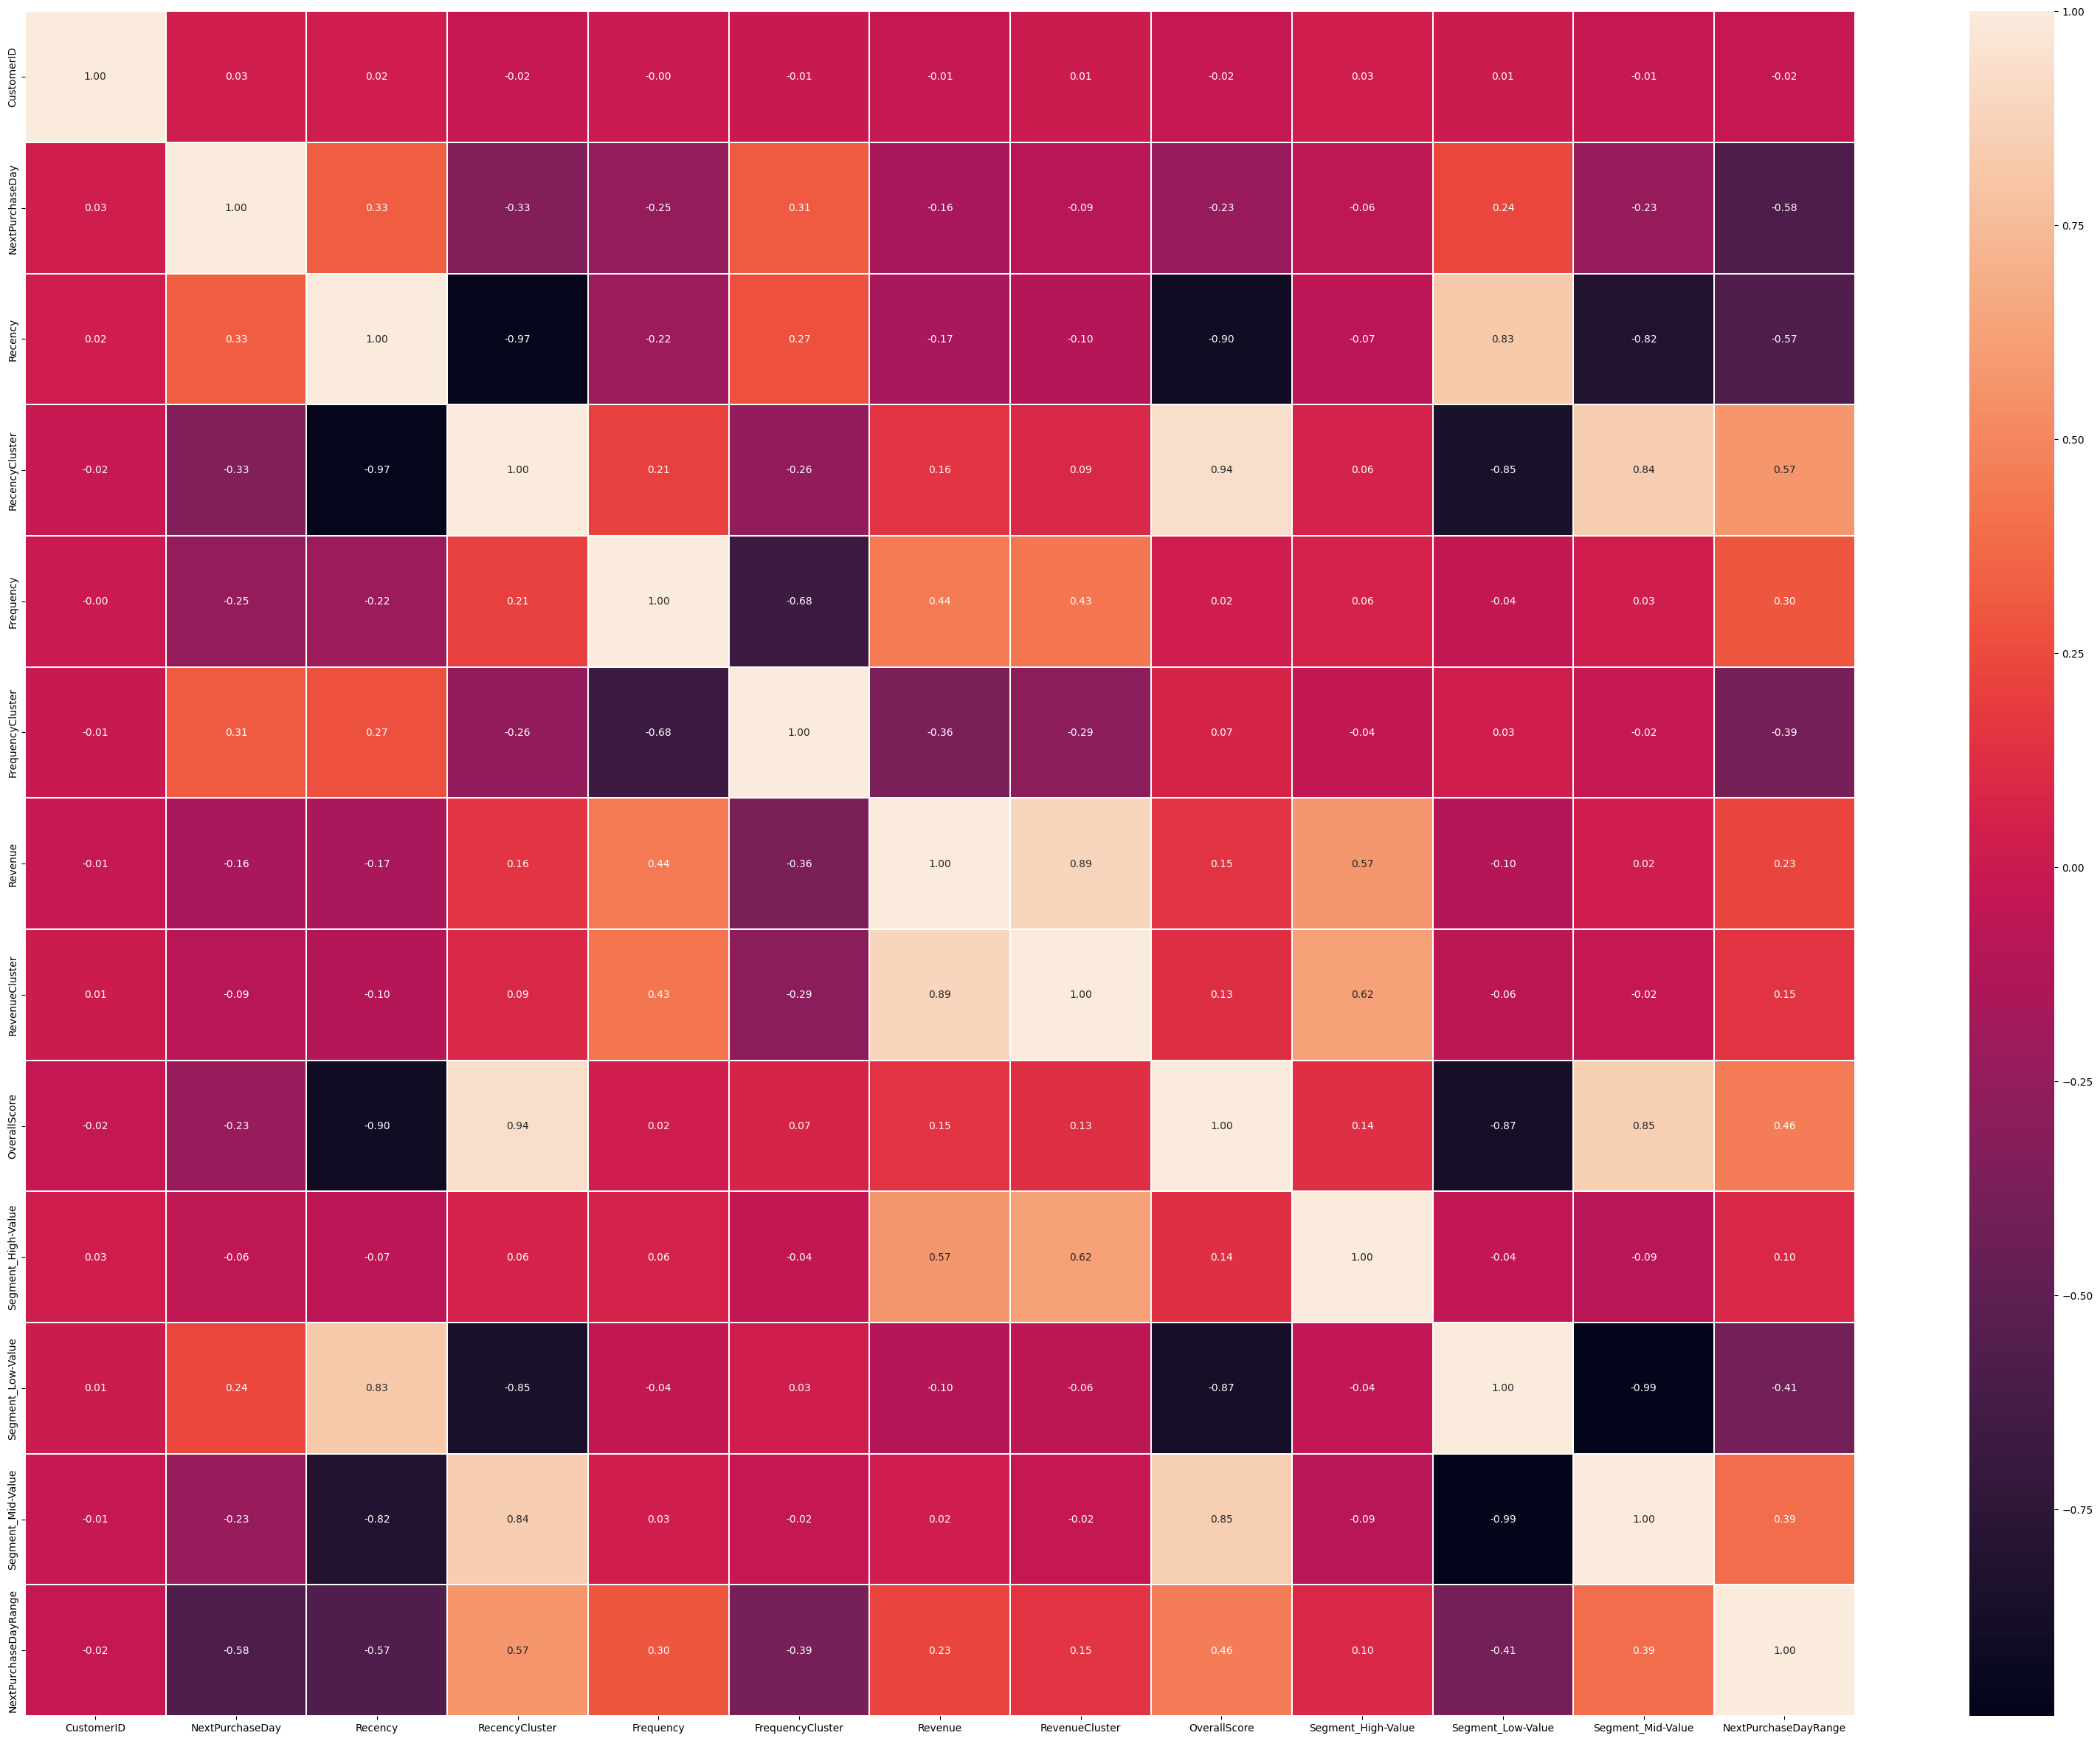

In [ ]:
plt.figure(figsize = (40, 30))
sns.heatmap(corr_matrix, annot = True, linewidths=0.2, fmt=".2f");

In [ ]:
ctm_class = ctm_class.drop('NextPurchaseDay', axis=1)

In [ ]:
ctm_class

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value,NextPurchaseDayRange
0,17850.0,202,0,312,2,5288.63,0,2,0,1,0,0
1,12433.0,266,0,420,2,13375.87,0,2,0,1,0,0
2,14723.0,257,0,278,2,1158.30,0,2,0,1,0,0
3,15351.0,269,0,233,2,1862.14,0,2,0,1,0,0
4,15808.0,206,0,210,2,3724.77,0,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3355,17511.0,14,3,1076,1,88125.38,2,6,0,0,1,1
3356,14156.0,14,3,1420,1,113384.14,2,6,0,0,1,1
3357,14911.0,1,3,5903,0,132572.62,2,5,0,0,1,1
3358,18102.0,26,3,433,2,256438.49,3,8,1,0,0,1


In [ ]:
X, y = ctm_class.drop('NextPurchaseDayRange', axis=1), ctm_class.NextPurchaseDayRange
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, shuffle=True)

In [ ]:
models = []
models.append(("LogisticRegression", LogisticRegression()))
models.append(("GaussianNB", GaussianNB()))
models.append(("RandomForestClassifier", RandomForestClassifier()))
models.append(("SVC", SVC()))
models.append(("DecisionTreeClassifier", DecisionTreeClassifier()))
models.append(("xgb.XGBClassifier", xgb.XGBClassifier(eval_metric='mlogloss')))
models.append(("KNeighborsClassifier", KNeighborsClassifier()))

In [ ]:
for name,model in models:
    kfold = KFold(n_splits=2)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    print(name, cv_result)

LogisticRegression [0.86681548 0.85639881]
GaussianNB [0.84747024 0.81994048]
RandomForestClassifier [0.86979167 0.86755952]
SVC [0.78794643 0.78943452]
DecisionTreeClassifier [0.82886905 0.83482143]
xgb.XGBClassifier [0.85491071 0.85267857]
KNeighborsClassifier [0.79389881 0.78571429]


In [ ]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

print('Accuracy of Random Forest classifier on training set: {:.2f}'
       .format(rf_model.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
       .format(rf_model.score(X_test[X_train.columns], y_test)))
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.87
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       468
           1       0.81      0.74      0.77       204

    accuracy                           0.87       672
   macro avg       0.85      0.83      0.84       672
weighted avg       0.86      0.87      0.86       672



In [ ]:
xgb_model = xgb.XGBClassifier().fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy of XGB classifier on training set: 1.00
Accuracy of XGB classifier on test set: 0.86
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       468
           1       0.78      0.76      0.77       204

    accuracy                           0.86       672
   macro avg       0.84      0.83      0.84       672
weighted avg       0.86      0.86      0.86       672



In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid
parameter = {
    'max_depth': range(3, 10, 2),
    'min_child_weight': range(1, 5, 2)
}

# Define a list of values for cv
cv_values = [2,3,4,6,7,8,9,20, 5, 10]  # You can add more values if needed

best_accuracy = 0
best_cv = None

# Perform GridSearchCV for each cv value
for cv_val in cv_values:
    p_grid_search = GridSearchCV(
        estimator=xgb.XGBClassifier(eval_metric='mlogloss'),
        param_grid=parameter,
        scoring='accuracy',
        n_jobs=-1,
        cv=cv_val
    )

    # Fit the grid search to the training data
    p_grid_search.fit(X_train, y_train)

    # Retrieve and print the best parameters and best score for each cv value
    best_params = p_grid_search.best_params_
    best_score = p_grid_search.best_score_

    # Compare accuracy to find the best cv value
    if best_score > best_accuracy:
        best_accuracy = best_score
        best_cv = cv_val

print(f"The highest accuracy of {best_accuracy:.4f} is achieved with cv={best_cv}.")


The highest accuracy of 0.8650 is achieved with cv=6.


In [ ]:
parameter = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,5,2)
    }

p_grid_search = GridSearchCV(estimator = xgb.XGBClassifier(eval_metric='mlogloss'),
                             param_grid = parameter,
                             scoring='accuracy',
                             n_jobs=-1,
                             #iid=False,
                             cv=6
                            )

p_grid_search.fit(X_train, y_train)

GridSearchCV(cv=6,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 5, 2)},
             scoring='accuracy')

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid
parameter = {
    'max_depth': range(3, 10, 2),
    'min_child_weight': range(1, 5, 2)
}

# Define a list of values for cv
cv_values = [2,3,4,6,7,8,9,20, 5, 10]  # You can add more values if needed

# Perform GridSearchCV for each cv value
for cv_val in cv_values:
    p_grid_search = GridSearchCV(
        estimator=xgb.XGBClassifier(eval_metric='mlogloss'),
        param_grid=parameter,
        scoring='accuracy',
        n_jobs=-1,
        cv=cv_val
    )

    # Fit the grid search to the training data
    p_grid_search.fit(X_train, y_train)

    # Retrieve and print the best parameters and best score for each cv value
    best_params = p_grid_search.best_params_
    best_score = p_grid_search.best_score_

    print(f"For cv={cv_val}:")
    print("Best Parameters:", best_params)
    print("Best Score:", best_score)
    print("-------------")


For cv=2:
Best Parameters: {'max_depth': 3, 'min_child_weight': 1}
Best Score: 0.8619791666666667
-------------
For cv=3:
Best Parameters: {'max_depth': 3, 'min_child_weight': 1}
Best Score: 0.8630952380952381
-------------
For cv=4:
Best Parameters: {'max_depth': 3, 'min_child_weight': 3}
Best Score: 0.8649553571428571
-------------
For cv=6:
Best Parameters: {'max_depth': 3, 'min_child_weight': 3}
Best Score: 0.8649553571428572
-------------
For cv=7:
Best Parameters: {'max_depth': 3, 'min_child_weight': 1}
Best Score: 0.8619791666666667
-------------
For cv=8:
Best Parameters: {'max_depth': 3, 'min_child_weight': 1}
Best Score: 0.8597470238095238
-------------
For cv=9:
Best Parameters: {'max_depth': 3, 'min_child_weight': 1}
Best Score: 0.8645908933332336
-------------
For cv=20:
Best Parameters: {'max_depth': 3, 'min_child_weight': 3}
Best Score: 0.86308181315644
-------------
For cv=5:
Best Parameters: {'max_depth': 3, 'min_child_weight': 3}
Best Score: 0.8593770984334006
-------

In [ ]:
p_grid_search.best_params_, p_grid_search.best_score_

({'max_depth': 3, 'min_child_weight': 3}, 0.8649553571428572)

In [ ]:
refined_xgb_model = xgb.XGBClassifier(eval_metric='logloss',
                                      max_depth=list(p_grid_search.best_params_.values())[0]-1,
                                      min_child_weight=list(p_grid_search.best_params_.values())[-1]+4
                                     ).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'.format(refined_xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'.format(refined_xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 0.90
Accuracy of XGB classifier on test set: 0.89


In [ ]:
ref_xgb_pred_y = refined_xgb_model.predict(X_test)

In [ ]:
ref_xgb_pred_y = refined_xgb_model.predict(X)

ctm_class['predictions'] = ref_xgb_pred_y

ctm_class_final = ctm_class[['CustomerID', 'predictions']]
ctm_class_final

,CustomerID,predictions
0,17850.0,0
1,12433.0,0
2,14723.0,0
3,15351.0,0
4,15808.0,0
...,...,...
3355,17511.0,1
3356,14156.0,1
3357,14911.0,1
3358,18102.0,1


In [ ]:
customer_country = data[['CustomerID', 'Country']]

ctm_class_final = pd.merge(ctm_class_final[['CustomerID', 'predictions']], customer_country, on='CustomerID', how='left')
ctm_class_final.drop_duplicates(subset='CustomerID', keep='last', inplace=True)
# Reset the index starting from 1
ctm_class_final.reset_index(drop=True, inplace=True)

ctm_class_final

,CustomerID,predictions,Country
0,17850.0,0,United Kingdom
1,12433.0,0,Norway
2,14723.0,0,United Kingdom
3,15351.0,0,United Kingdom
4,15808.0,0,United Kingdom
...,...,...,...
3355,17511.0,1,United Kingdom
3356,14156.0,1,EIRE
3357,14911.0,1,EIRE
3358,18102.0,1,United Kingdom


In [ ]:
def get_confusion_matrix(y_test, y_pred):
    """
    Displays the confusion matrix of the input numpy arrays y_test and y_pred.

    INPUT:
        y_test - A numpy array
        y_pred - A numpy array

    OUTPUT:
        NoneType
    """

    data = {'y_Actual': y_test, 'y_Predicted': y_pred}

    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    conf_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'],
                              rownames=['Actual'],
                              colnames=['Predicted'])

    sns.heatmap(conf_matrix, annot=True, fmt = "d", cmap="Spectral")
    plt.show()


In [ ]:
get_confusion_matrix(np.array(y_test), ref_xgb_pred_y)


ValueError: ignored

In [ ]:
kmeans_model = KMeans(init='k-means++',  max_iter=400, random_state=42)
kmeans_model.fit(ctm_dt[['Recency','Frequency','Revenue']])
def try_different_clusters(K, data):

    cluster_values = list(range(1, K+1))
    inertias=[]

    for c in cluster_values:
        model = KMeans(n_clusters = c,init='k-means++',max_iter=400,random_state=42)
        model.fit(data)
        inertias.append(model.inertia_)

    return inertias
outputs = try_different_clusters(12, ctm_dt[['Recency','Frequency','Revenue']])
distances = pd.DataFrame({"clusters": list(range(1, 13)),"sum of squared distances": outputs})
figure = go.Figure()
figure.add_trace(go.Scatter(x=distances["clusters"], y=distances["sum of squared distances"]))

figure.update_layout(xaxis = dict(tick0 = 1,dtick = 1,tickmode = 'linear'),
                  xaxis_title="Number of clusters",
                  yaxis_title="Sum of squared distances",
                  title_text="Finding optimal number of clusters using elbow method")
figure.show()

In [ ]:
kmeans_model_new = KMeans(n_clusters = 5,init='k-means++',max_iter=400,random_state=42)

kmeans_model_new.fit_predict(ctm_dt[['Recency','Frequency','Revenue']])
cluster_centers = kmeans_model_new.cluster_centers_
data = np.expm1(cluster_centers)
points = np.append(data, cluster_centers, axis=1)
points
points = np.append(points, [[0], [1], [2], [3],[4]], axis=1)
ctm_dt["clusters"] = kmeans_model_new.labels_
figure = px.scatter_3d(ctm_dt,
                    color='clusters',
                    x="Recency",
                    y="Frequency",
                    z="Revenue",
                    category_orders = {"clusters": ["0", "1", "2", "3", "4"]}
                    )
figure.update_layout()
figure.show()

In [ ]:
ctm_dt['OS1']=ctm_dt['OverallScore'].div(2).round(3)
figure = px.scatter_3d(ctm_dt,
                    color='OS1',
                    x="Recency",
                    y="Frequency",
                    z="Revenue",
                    category_orders = {"clusters": ["0", "1", "2", "3", "4"]}
                    )
figure.update_layout()
figure.show()

In [ ]:
ctm_class_final.to_csv("./submission.csv")

<Axes: xlabel='CustomerID', ylabel='Count'>

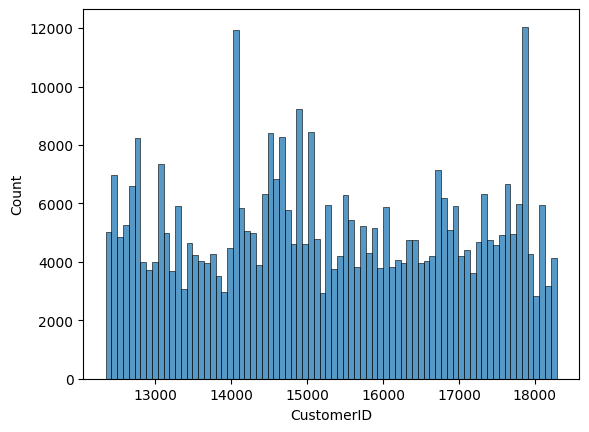

In [ ]:
sns.histplot(data=data,x='CustomerID')

In [ ]:
sns.histplot(data=data,x='Country')

In [ ]:
!pip install streamlit
!pip install streamlit pyngrok
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 82.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.6 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# avoid displaying warnings
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import plotly.express as px
#import plotly.offline as pyoff
import plotly.graph_objs as go
#import plotly.figure_factory as ff
#AUC, confusion matrix

#import machine learning related libraries
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.cluster import KMeans
import xgboost as xgb
import time
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

#----------------------------------------------

dataset=pd.read_excel("Online_Retail.xlsx")
print(dataset)
data=dataset.dropna()
data.InvoiceDate = pd.to_datetime(data.InvoiceDate)

data.head()

print('From the dataset, the online retail shop has {} customers \
from {} different countries.'.format(len(data.CustomerID.unique()), len(data.Country.unique())))
ctm_cntry_df = data.groupby(['CustomerID', 'Country']).count().reset_index()

ctm_cntry_df = ctm_cntry_df.groupby('Country')['CustomerID'].count().reset_index().sort_values(
    by=['CustomerID'], ascending=False)

# Create a new column, Percentage to calculate the customer representation in percentage
ctm_cntry_df['Percentage']= np.round(ctm_cntry_df.CustomerID / ctm_cntry_df.CustomerID.sum() * 100, 2)

ctm_cntry_df.head(10)
ctm_2_cntry = {}

# for each index and customer id
for idx, cid in enumerate(data.CustomerID.unique()):

    # Get the country that the customer resides
    cntry = data[data.CustomerID == cid].Country.unique()

    # if customer has lived in more than 1 country
    if len(cntry) > 1:

        # Update the ctm_2_cntry
        ctm_2_cntry[cid] = cntry

pd.DataFrame(ctm_2_cntry) # Create a pandas dataframe using ctm_2_cntry
percent_margin = 0.25

# Create a new column, CountryCategory and set values to the corresponding values of the Country column
ctm_cntry_df['CountryCategory'] = ctm_cntry_df.Country

# Set Countries with Percentage less than or equal to percent_margin to 'Other Countries'

ctm_cntry_df.loc[ctm_cntry_df.Percentage <= percent_margin, 'CountryCategory'] = 'Other Countries'

ctm_cntry_df.head(11)

############################################
pie_fig = px.pie(ctm_cntry_df,
                    names="CountryCategory",
                    values="Percentage",
                    title="Customer Country Count in Percentage"
                    )

pie_fig.update_layout(title_x=0,
                          legend_title="Countries Represented",
                          legend=dict(orientation="h")
                        )

pie_fig.show(config={'displaylogo': False})
#############################################
data['InvoiceYearMonth'] = data['InvoiceDate'].map(lambda date: 100*date.year + date.month)
data.head()
data['Revenue'] = data.UnitPrice * data.Quantity
data.head()
ctm_revenue = data.groupby('InvoiceYearMonth').Revenue.sum().reset_index()
ctm_revenue.head()
ctm_revenue['InvoiceYearMonth'] = ctm_revenue['InvoiceYearMonth'].apply(lambda x: f"{x // 100}-{x % 100:02}")
line_fig = px.line(ctm_revenue,
                   x = "InvoiceYearMonth",
                   y = "Revenue",
                   title = "Montly Revenue from Dec. 2010 to Dec. 2011"
                  )

line_fig.update_layout(title_x=0.5,
                       showlegend=False,
                       xaxis={"type": "category"},
                       xaxis_title="Invoice Year-Month",
                       yaxis_title="Monthly Revenue"
                      )

line_fig.show(config={'displaylogo': False})
cntry_revenue_df = data.groupby(['Country']).Revenue.sum().reset_index().sort_values(by=['Revenue'],
                                                                                        ascending=False)

cntry_revenue_df['Percentage'] = np.round(cntry_revenue_df.Revenue / cntry_revenue_df.Revenue.sum() * 100, 2)

cntry_revenue_df.head(5)
percent_margin = 0.25

# Create a new column, CountryCategory and set values to the corresponding values of the Country column
cntry_revenue_df['CountryCategory'] = cntry_revenue_df.Country

# Set Countries with Percentage less than or equal to percent_margin to 'Other Countries'

cntry_revenue_df.loc[cntry_revenue_df.Percentage <= percent_margin, 'CountryCategory'] = 'Other Countries'

cntry_revenue_df.head(11)
pie_fig = px.pie(cntry_revenue_df,
                 names="CountryCategory",
                 values="Percentage",
                 title="Country Revenue in Percentage"
                )

pie_fig.update_layout(title_x=0,
                      legend_title="Countries Represented",
                      legend=dict(orientation="h")
                     )

pie_fig.show(config={'displaylogo': False})
ctm_bhvr_dt = data[(data.InvoiceDate < pd.Timestamp(2011,9,1)) &
      (data.InvoiceDate >= pd.Timestamp(2010,12,1))].reset_index(drop=True)


ctm_next_quarter = data[(data.InvoiceDate < pd.Timestamp(2011,12,1)) &
      (data.InvoiceDate >= pd.Timestamp(2011,9,1))].reset_index(drop=True)
ctm_dt = pd.DataFrame(ctm_bhvr_dt['CustomerID'].unique())

# Rename the column to CustomerID.
ctm_dt.columns = ['CustomerID']
ctm_1st_purchase_in_next_quarter = ctm_next_quarter.groupby('CustomerID').InvoiceDate.min().reset_index()
ctm_1st_purchase_in_next_quarter.columns = ['CustomerID','MinPurchaseDate']
ctm_last_purchase_bhvr_dt = ctm_bhvr_dt.groupby('CustomerID').InvoiceDate.max().reset_index()
ctm_last_purchase_bhvr_dt.columns = ['CustomerID','MaxPurchaseDate']
ctm_purchase_dates = pd.merge(ctm_last_purchase_bhvr_dt, ctm_1st_purchase_in_next_quarter, on='CustomerID',
                              how='left')
ctm_purchase_dates['NextPurchaseDay'] = (ctm_purchase_dates['MinPurchaseDate'] - ctm_purchase_dates['MaxPurchaseDate']).dt.days
ctm_dt = pd.merge(ctm_dt, ctm_purchase_dates[['CustomerID','NextPurchaseDay']], on='CustomerID', how='left')
ctm_dt = ctm_dt.fillna(9999)
ctm_max_purchase = ctm_bhvr_dt.groupby('CustomerID').InvoiceDate.max().reset_index()
ctm_max_purchase.columns = ['CustomerID','MaxPurchaseDate']
ctm_max_purchase['Recency'] = (ctm_max_purchase['MaxPurchaseDate'].max() - ctm_max_purchase['MaxPurchaseDate']).dt.days

# Merge the dataframes ctm_dt and ctm_max_purchase[['CustomerID', 'Recency']] on the CustomerID column.
ctm_dt = pd.merge(ctm_dt, ctm_max_purchase[['CustomerID', 'Recency']], on='CustomerID')
hist_fig = px.histogram(ctm_dt,
                        x="Recency",
                        title="Customers Recency in Days"                       )

hist_fig.update_layout(title_x=0.5,
                       xaxis_title="Recency in groups of 20 days",
                       yaxis_title="Number of Customers"
                      )

hist_fig.show(config={'displaylogo': False})
my_dict={}
ctm_recency = ctm_dt[['Recency']]
for idx in range(1, 10):
    kmeans = KMeans(n_clusters=idx, max_iter=1000).fit(ctm_recency)
    ctm_recency["clusters"] = kmeans.labels_
    my_dict[idx] = kmeans.inertia_

line_fig = px.line(x=list(my_dict.keys()),
                   y=list(my_dict.values()),
                   template="plotly_dark"
                  )

line_fig.update_layout(title_x=0,
                       xaxis_title="Number of cluster",
                       yaxis_title=""
                      )

line_fig.show(config={'displaylogo': False})
number_of_clusters = 4
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(ctm_dt[['Recency']])
ctm_dt['RecencyCluster'] = kmeans.predict(ctm_dt[['Recency']])
def order_cluster(df, target_field_name, cluster_field_name, ascending):
    """
    INPUT:
        - df                  - pandas DataFrame
        - target_field_name   - str - A column in the pandas DataFrame df
        - cluster_field_name  - str - Expected to be a column in the pandas DataFrame df
        - ascending           - Boolean

    OUTPUT:
        - df_final            - pandas DataFrame with target_field_name and cluster_field_name as columns

    """
    # Add the string "new_" to cluster_field_name
    new_cluster_field_name = "new_" + cluster_field_name

    # Create a new dataframe by grouping the input dataframe by cluster_field_name and extract target_field_name
    # and find the mean
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()

    # Sort the new dataframe df_new, by target_field_name in descending order
    df_new = df_new.sort_values(by=target_field_name, ascending=ascending).reset_index(drop=True)

    # Create a new column in df_new with column name index and assign it values to df_new.index
    df_new["index"] = df_new.index

    # Create a new dataframe by merging input dataframe df and part of the columns of df_new based on
    # cluster_field_name
    df_final = pd.merge(df, df_new[[cluster_field_name, "index"]], on=cluster_field_name)

    # Update the dataframe df_final by deleting the column cluster_field_name
    df_final = df_final.drop([cluster_field_name], axis=1)

    # Rename the column index to cluster_field_name
    df_final = df_final.rename(columns={"index": cluster_field_name})

    return df_final
ctm_dt = order_cluster(ctm_dt, 'Recency', 'RecencyCluster', False)

ctm_frequency = data.groupby('CustomerID').InvoiceDate.count().reset_index()
ctm_frequency.columns = ['CustomerID','Frequency']
ctm_dt = pd.merge(ctm_dt, ctm_frequency, on='CustomerID')
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(ctm_dt[['Frequency']])
ctm_dt['FrequencyCluster'] = kmeans.predict(ctm_dt[['Frequency']])
ctm_dt = order_cluster(ctm_dt, 'Frequency', 'FrequencyCluster', False)
ctm_revenue = data.groupby('CustomerID').Revenue.sum().reset_index()
ctm_dt = pd.merge(ctm_dt, ctm_revenue, on='CustomerID')
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(ctm_dt[['Revenue']])
ctm_dt['RevenueCluster'] = kmeans.predict(ctm_dt[['Revenue']])
ctm_dt = order_cluster(ctm_dt, 'Revenue', 'RevenueCluster', True)
ctm_dt['OverallScore'] = ctm_dt['RecencyCluster'] + ctm_dt['FrequencyCluster'] + ctm_dt['RevenueCluster']
ctm_dt.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()
ctm_dt['Segment'] = 'Low-Value'
ctm_dt.loc[ctm_dt['OverallScore'] > 4, 'Segment'] = 'Mid-Value'
ctm_dt.loc[ctm_dt['OverallScore'] > 6, 'Segment'] = 'High-Value'
ctm_class = ctm_dt.copy()
ctm_class = pd.get_dummies(ctm_class)
ctm_class['NextPurchaseDayRange'] = 1  ## less than 3 months
ctm_class.loc[ctm_class.NextPurchaseDay>90,'NextPurchaseDayRange'] = 0 # more than 3 months
corr_matrix = ctm_class[ctm_class.columns].corr()
corr_df = pd.DataFrame(corr_matrix.min())
corr_df.columns = ['MinCorrelationCoeff']
corr_df['MaxCorrelationCoeff'] = corr_matrix[corr_matrix < 1].max()
corr_df
plt.figure(figsize = (40, 30))
sns.heatmap(corr_matrix, annot = True, linewidths=0.2, fmt=".2f");
ctm_class = ctm_class.drop('NextPurchaseDay', axis=1)
X, y = ctm_class.drop('NextPurchaseDayRange', axis=1), ctm_class.NextPurchaseDayRange
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, shuffle=True)


models = []
models.append(("LogisticRegression", LogisticRegression()))
models.append(("GaussianNB", GaussianNB()))
models.append(("RandomForestClassifier", RandomForestClassifier()))
models.append(("SVC", SVC()))
models.append(("DecisionTreeClassifier", DecisionTreeClassifier()))
models.append(("xgb.XGBClassifier", xgb.XGBClassifier(eval_metric='mlogloss')))
models.append(("KNeighborsClassifier", KNeighborsClassifier()))
for name,model in models:
    kfold = KFold(n_splits=2)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    print(name, cv_result)

rf_model = RandomForestClassifier().fit(X_train, y_train)

print('Accuracy of Random Forest classifier on training set: {:.2f}'
       .format(rf_model.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
       .format(rf_model.score(X_test[X_train.columns], y_test)))
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))


xgb_model = xgb.XGBClassifier().fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid
parameter = {
    'max_depth': range(3, 10, 2),
    'min_child_weight': range(1, 5, 2)
}

# Define a list of values for cv
cv_values = [2,3,4,5,6,7,8,9,10,15,20,]  # You can add more values if needed

best_accuracy = 0
best_cv = None

# Perform GridSearchCV for each cv value
for cv_val in cv_values:
    p_grid_search = GridSearchCV(
        estimator=xgb.XGBClassifier(eval_metric='mlogloss'),
        param_grid=parameter,
        scoring='accuracy',
        n_jobs=-1,
        cv=cv_val
    )

    # Fit the grid search to the training data
    p_grid_search.fit(X_train, y_train)

    # Retrieve and print the best parameters and best score for each cv value
    best_params = p_grid_search.best_params_
    best_score = p_grid_search.best_score_

    # Compare accuracy to find the best cv value
    if best_score > best_accuracy:
        best_accuracy = best_score
        best_cv = cv_val

print(f"The highest accuracy of {best_accuracy:.4f} is achieved with cv={best_cv}.")

parameter = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,5,2)
    }

p_grid_search = GridSearchCV(estimator = xgb.XGBClassifier(eval_metric='mlogloss'),
                             param_grid = parameter,
                             scoring='accuracy',
                             n_jobs=-1,
                             #iid=False,
                             cv=6
                            )

p_grid_search.fit(X_train, y_train)
p_grid_search.best_params_, p_grid_search.best_score_
refined_xgb_model = xgb.XGBClassifier(eval_metric='logloss',
                                      max_depth=list(p_grid_search.best_params_.values())[0]-1,
                                      min_child_weight=list(p_grid_search.best_params_.values())[-1]+4
                                     ).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'.format(refined_xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'.format(refined_xgb_model.score(X_test[X_train.columns], y_test)))
ref_xgb_pred_y = refined_xgb_model.predict(X_test)
ref_xgb_pred_y = refined_xgb_model.predict(X)

ctm_class['predictions'] = ref_xgb_pred_y

ctm_class_final = ctm_class[['CustomerID', 'predictions']]
ctm_class_final
customer_country = data[['CustomerID', 'Country']]

ctm_class_final = pd.merge(ctm_class_final[['CustomerID', 'predictions']], customer_country, on='CustomerID', how='left')
ctm_class_final.drop_duplicates(subset='CustomerID', keep='last', inplace=True)
# Reset the index starting from 1
ctm_class_final.reset_index(drop=True, inplace=True)

ctm_class_final

##########################
kmeans_model = KMeans(init='k-means++',  max_iter=400, random_state=42)
kmeans_model.fit(ctm_dt[['Recency','Frequency','Revenue']])
def try_different_clusters(K, data):

    cluster_values = list(range(1, K+1))
    inertias=[]

    for c in cluster_values:
        model = KMeans(n_clusters = c,init='k-means++',max_iter=400,random_state=42)
        model.fit(data)
        inertias.append(model.inertia_)

    return inertias
outputs = try_different_clusters(12, ctm_dt[['Recency','Frequency','Revenue']])
distances = pd.DataFrame({"clusters": list(range(1, 13)),"sum of squared distances": outputs})
figure = go.Figure()
figure.add_trace(go.Scatter(x=distances["clusters"], y=distances["sum of squared distances"]))

figure.update_layout(xaxis = dict(tick0 = 1,dtick = 1,tickmode = 'linear'),
                  xaxis_title="Number of clusters",
                  yaxis_title="Sum of squared distances",
                  title_text="Finding optimal number of clusters using elbow method")
figure.show()
ctm_dt['OS1']=ctm_dt['OverallScore'].div(2).round(3)
figure = px.scatter_3d(ctm_dt,
                    color='OS1',
                    x="Recency",
                    y="Frequency",
                    z="Revenue",
                    category_orders = {"clusters": ["0", "1", "2", "3", "4"]}
                    )
figure.update_layout()
figure.show()


##############

st.title("Interactive Plot Viewer")

# Sidebar for user interaction
st.sidebar.header("Select Plot")
plot_choice = st.sidebar.selectbox("Choose a Plot", ("Pie Chart", "Line Chart"))

# Main content area
st.header("Selected Plot")

if plot_choice == "Pie Chart":
    st.plotly_chart(pie_fig)  # Display pie chart when selected
elif plot_choice == "Line Chart":
    st.plotly_chart(line_fig)  # Display line chart when selected

Writing app.py


In [ ]:
from pyngrok import ngrok

# Terminate open tunnels if exist
ngrok.kill()

# Set the authtoken
ngrok.set_auth_token("2Z2OwWheOVA9BCe2FBstfdc9NTt_3FnAyeXY2cqFZ3x54WeAv")

In [ ]:
!nohup streamlit run app.py &


nohup: appending output to 'nohup.out'


In [ ]:
!ngrok authtoken 2Z2OwWheOVA9BCe2FBstfdc9NTt_3FnAyeXY2cqFZ3x54WeAv


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok

# Open a HTTP tunnel on the default port 8501 (Streamlit's default)
public_url = ngrok.connect(8501)
print(public_url)

NgrokTunnel: "https://ee2e-34-132-60-212.ngrok-free.app" -> "http://localhost:8501"
